In [6]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/train'
valid_path = '/content/drive/MyDrive/Datasets/test'

ResNet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in ResNet.layers:
    layer.trainable = False

folders = glob('/content/drive/MyDrive/Datasets/train/*')

print(len(folders))
x = Flatten()(ResNet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# model object
model = Model(inputs=ResNet.input, outputs=prediction)

#structure of the model
model.summary()


94773248/94765736 [==============================] - 0s 0us/step
2
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 1970s 12s/step - loss: 1.2662 - accuracy: 0.7673 - val_loss: 1.2555 - val_accuracy: 0.6314
Epoch 2/5
163/163 [==============================] - 105s 642ms/step - loss: 0.3436 - accuracy: 0.8600 - val_loss: 0.5095 - val_accuracy: 0.7724
Epoch 3/5
163/163 [==============================] - 104s 638ms/step - loss: 0.3714 - accuracy: 0.8526 - val_loss: 0.3414 - val_accuracy: 0.8590
Epoch 4/5
163/163 [==============================] - 103s 633ms/step - loss: 0.2911 - accuracy: 0.8842 - val_loss: 0.4557 - val_accuracy: 0.8013
Epoch 5/5
163/163 [==============================] - 103s 634ms/step - loss: 0.2893 - accuracy: 0.8848 - val_loss: 0.5547 - val_accuracy: 0.7740


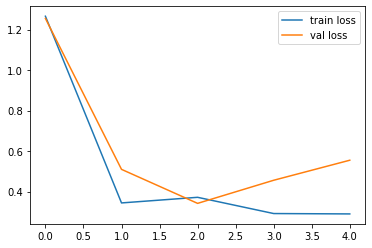

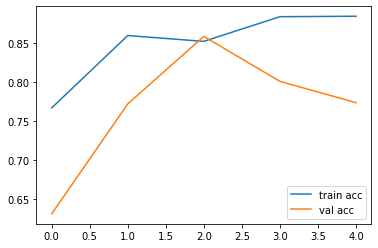

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<Figure size 432x288 with 0 Axes>

In [8]:
# cost and optimization method 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets/acclossplots/resLossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets/acclossplots/resAccVal_acc')

import tensorflow as tf

from keras.models import load_model
model.save("/content/drive/MyDrive/Datasets/medResNet.h5")

In [5]:


#Image('/content/drive/MyDrive/Datasets/resAccVal_acc')
from IPython.display import Image

Image('/content/drive/MyDrive/Datasets/resAccVal_acc')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input
import numpy as np
model = load_model('/content/drive/MyDrive/Datasets/medResNet.h5')
img = image.load_img('/content/drive/MyDrive/Datasets/test/PNEUMONIA/person1_virus_7.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
class_ = model.predict(img_data)
pred= class_[0][0]

if pred>0.5:
  print("Normal")
else:
  print("Disease")


Disease
